## IMPORTS

In [29]:
from os import walk
from os.path import join
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## Constants

In [25]:
EXAMPLE_FILE = 'SpamData/01_Processing/practice_email.txt'
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'
NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'

EMAIL_TEXT_JSON_PATH = 'SpamData/01_Processing/email-text.json'


SPAM_CAT = 1
NONSPAM_CAT = 0

### Reading files

In [3]:
stream = open(EXAMPLE_FILE,encoding='latin_1')
message = stream.read()
stream.close()

print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

In [4]:
stream = open(EXAMPLE_FILE,encoding='latin_1')

is_body = False
lines = []
for line in stream:
    if is_body:
        lines.append(line)
    elif line == '\n':
        is_body=True

stream.close()

message_body = '\n'.join(lines)
print(message_body)





Dear Mr Still



Good tidings to you and all your staff for the festive season ahead (Christmas).

Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.

But WAIT! You're probably thinking: "What makes him so special?"

Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.

You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.

I look forward to hearing from you.



Best wishes

Robin Cooper

[Excerpt from the book: The Timewaster Let

In [5]:
import sys
sys.getfilesystemencoding()

'utf-8'

## Generator function

In [6]:
def generator_function(N):
    for num in range(N):
        yield num ** 2

In [7]:
for i in generator_function(3):
    print(i)

0
1
4


## Email Body Extraction

In [8]:
def get_email_body(path):
    
    for root, dirname, filenames in walk(path):
        for file_name in filenames:
            filepath = join(root,file_name)

            stream = open(filepath, encoding='latin_1')
            is_body = False
            lines = []
            for line in stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body=True

            stream.close()

            email_body = '\n'.join(lines)
            yield file_name, email_body


In [9]:
def dataframe_from_directory(path,classification):
    rows = []
    rows_name = []
    for file_name, email_body in get_email_body(path):
        rows.append({'MESSAGE' : email_body, 'CATEGORY' : classification})
        rows_name.append(file_name)
        
    return pd.DataFrame(rows,index=rows_name)
        
    

In [10]:
spam_emails =  dataframe_from_directory(SPAM_1_PATH,SPAM_CAT) # 1 : spam 0 : nonspam
spam_emails = spam_emails.append( dataframe_from_directory(SPAM_2_PATH,SPAM_CAT))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [11]:
spam_emails.shape

(1898, 2)

In [12]:
non_spam_emails = dataframe_from_directory(NONSPAM_1_PATH,NONSPAM_CAT)
non_spam_emails = non_spam_emails.append(dataframe_from_directory(NONSPAM_2_PATH,NONSPAM_CAT))
print(non_spam_emails.shape)
non_spam_emails.head()

(3901, 2)


,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [13]:
data = pd.concat([spam_emails,non_spam_emails])
print(f' shape of entire dataframe is {data.shape}')

 shape of entire dataframe is (5799, 2)


In [14]:
data.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [15]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


## Checking for null or missing values

In [16]:
# NOTE : there is diff between missing(length = 0) and null (none type object) messages


data['MESSAGE'].isnull().values.any()

False

In [17]:
# No null emails 

data['MESSAGE'].isnull().sum()

0

In [18]:
(data['MESSAGE'].str.len() == 0 )

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5799, dtype: bool

In [19]:
# total number of empty emails

(data['MESSAGE'].str.len() == 0 ).sum()

3

In [20]:
# Locating empty emails

data[data['MESSAGE'].str.len() == 0].index

Index(['cmds', 'cmds', 'cmds'], dtype='object')

## Removing system file entries (cmds files)

In [21]:
data = data.drop(['cmds'])

In [22]:
data.shape  #removed 3 files

(5796, 2)

## Assigning document ID to each row 

In [23]:
document_ids = range(0,len(data.index))
document_ids
data['DOC_ID'] = document_ids  # column to hold index 0-5796

In [24]:
data['FILE_NAME'] = data.index   #creating separate column to hold original file names
data.set_index('DOC_ID',inplace=True)  #changing index from filenales to DOC_ID
data.head()
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


## storing emails data to json file

In [26]:
data.to_json(EMAIL_TEXT_JSON_PATH)

## calculating amount of spam and legit emails

In [30]:
data['CATEGORY'].value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [53]:
amount_of_spam = data['CATEGORY'].value_counts()[1]
amount_of_ham = data['CATEGORY'].value_counts()[0]

category_names = ['spam' , 'legit emails']
sizes = [amount_of_spam ,amount_of_ham]

chart_colors = ['#b2ebf2','#e97171']

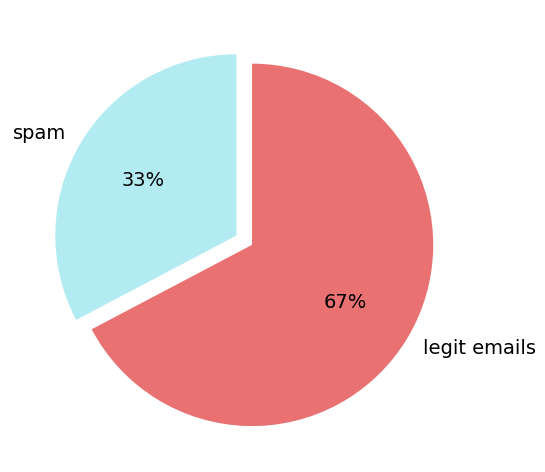

In [54]:
plt.figure(figsize=(6,6),dpi = 100) # dpi: density of pixels per inch
plt.pie(sizes ,labels=category_names,textprops={'fontsize' : 14} ,startangle=90,colors=chart_colors,explode=[0,0.1],autopct='%1.0f%%')
plt.show()